## ASISTENCIA DIAGNÓSTICA CON VISIÓN ARTIFICIAL Y DEEP LEARNING DE LESIONES MELANOCÍTICAS EN IMÁGENES DERMATOSCÓPICAS CON INTERFAZ GRÁFICA PARA CARGA DE IMÁGENES



# Integrantes: 
# Mario Miguel Barbosa Rengifo
#José Francisco Martínez Amaya 
#Luis Fernando Ramírez Cardozo
#Jhony Andrés Valderrama Molano








1.2.1 Nombre del proyecto: Asistencia diagnóstica con visión artificial y Deep learning de lesiones melanocíticas en imágenes dermatoscópicas con Interfaz gráfica para la carga de imágenes.

1.2.2 Integrantes
Mario Miguel Barbosa Rengifo
José Francisco Martínez Amaya 
Luis Fernando Ramírez Cardozo
Jhony Andrés Valderrama Molano


1.2.3 Planteamiento del problema

La dermatocospía es una técnica diagnóstica de relativo bajo costo y amplia accesibilidad, que permite mejorar el diagnóstico de lesiones dermatológicas en comparación con el ojo desnudo (sin amplificación). Los avances tecnológicos en los dispositivos móviles y las cámaras fotográficas han permitido la recolección de muchas imágenes de lesiones dermatológicas de una manera estandarizada y adecuada. Lo anterior hace que estas imágenes sean propicias para el entrenamiento de redes neuronales para la asistencia diagnóstica de lesiones cutáneas. 


Muchos autores han logrado entrenar redes neuronales con el fin de detectar melanoma, un tipo de cáncer que es muy agresivo y cuyo diagnóstico no es sencillo. A pesar de los logros iniciales, los primeros estudios carecen de un tamaño de muestra adecuado y sus poblaciones no representaban otras lesiones cutáneas que se pueden confundir con el melanoma. Los recientes avances en las tarjetas gráficas y las técnicas de aprendizaje automático representan un incentivo para aproximar la complejidad de este problema diagnóstico y genera expectativa con respecto a la posibilidad de tener sistemas de diagnóstico automático que no requieren la intervención de un experto humano1⁠.


Problema;

¿Es posible validar la utilidad del entrenamiento de modelos de CNN, como Inception-v4 e Inception-ResNet-V2 para tareas de detección y localización de lesiones melanocíticas en imágenes dermatoscópicas empleando un conjunto de datos diferente al empleado por los investigadores del estudio original?

1.2.4 Posible metodología usada para resolver el problema planteado


Se realizará preprocesamiento del conjunto de datos, posteriormente se implementará al menos dos arquitecturas de redes neuronales convolucionales, se calculará las métricas (Recall, Accuracy), además de la matriz de confusión de cada modelo. Según lo relatado por otros autores existen arquitecturas con adecuado desempeño en el problema (Ver tabla 1). Estas arquitecturas son las RESNET, SQUEEZNET, DENSENET, INCEPTIONV3. Sin embargo, se desconoce el desempeño de nuevas arquitecturas como ResNet-50, Xception (2016), INCEPTION-V4 (2016), INCEPTION-RESNET-V2 (2016), ResNeXt-50 (2017) en la asistencia diagnóstica de melanoma por lo que su implementación podría mejorar las métricas de desempeño del modelo2⁠.



In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
base_skin_dir = os.path.join('/content/drive/MyDrive/Dataset')

In [3]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [4]:
tile_df = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))
tile_df['path'] = tile_df['image_id'].map(imageid_path_dict.get)
tile_df['cell_type'] = tile_df['dx'].map(lesion_type_dict.get) 
tile_df['cell_type_idx'] = pd.Categorical(tile_df['cell_type']).codes
tile_df.sample(3)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,path,cell_type,cell_type_idx
5037,HAM_0000103,ISIC_0032041,nv,follow_up,60.0,female,lower extremity,vidir_molemax,/content/drive/MyDrive/Dataset/HAM10000_images...,Melanocytic nevi,4
3399,HAM_0002782,ISIC_0030536,nv,follow_up,55.0,male,back,vidir_molemax,/content/drive/MyDrive/Dataset/HAM10000_images...,Melanocytic nevi,4
1669,HAM_0003421,ISIC_0034094,mel,histo,55.0,female,upper extremity,vidir_modern,/content/drive/MyDrive/Dataset/HAM10000_images...,Melanoma,5


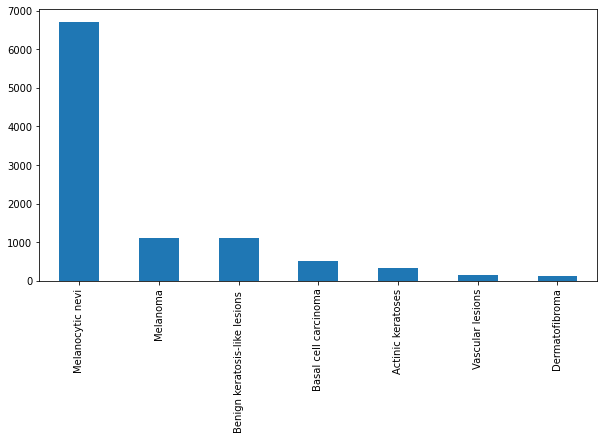

In [5]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
tile_df['cell_type'].value_counts().plot(kind='bar', ax=ax1)

Text(0, 0.5, 'Frecuencia')

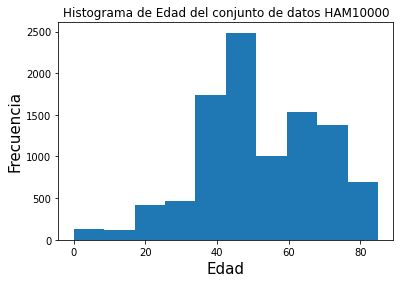

In [ ]:
## Gráficos descriptivos
ax = tile_df['age'].hist(bins=10,grid=False)
ax.set_title("Histograma de Edad del conjunto de datos HAM10000")
ax.set_xlabel("Edad",fontsize=15)
ax.set_ylabel("Frecuencia",fontsize=15)


Text(0, 0.5, 'Frecuencia Absoluta')

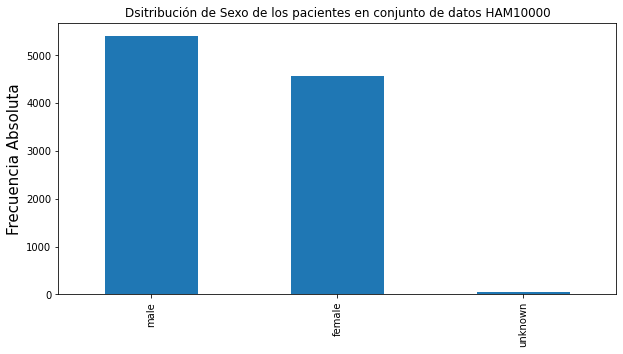

In [ ]:
fig, ax2 = plt.subplots(1, 1, figsize = (10, 5))
tile_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_title("Dsitribución de Sexo de los pacientes en conjunto de datos HAM10000")
ax2.set_ylabel("Frecuencia Absoluta",fontsize=15)

Text(0, 0.5, 'Frecuencia Absoluta')

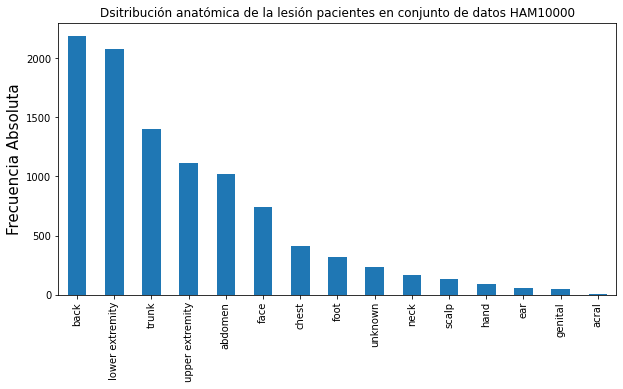

In [ ]:
fig, ax3 = plt.subplots(1, 1, figsize = (10, 5))
tile_df['localization'].value_counts().plot(kind='bar', ax=ax3)
ax3.set_title("Dsitribución anatómica de la lesión pacientes en conjunto de datos HAM10000")
ax3.set_ylabel("Frecuencia Absoluta",fontsize=15)

Text(0, 0.5, 'Frecuencia Absoluta')

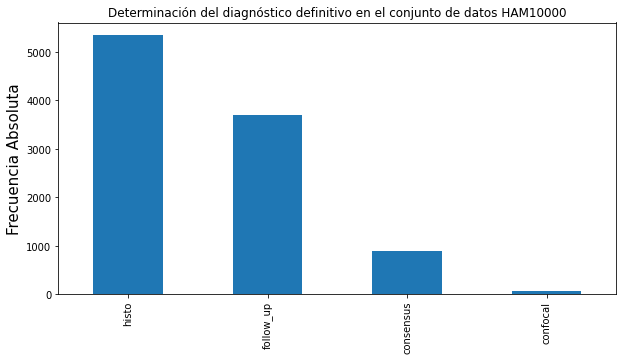

In [12]:
fig, ax6 = plt.subplots(1, 1, figsize = (10, 5))
tile_df['dx_type'].value_counts().plot(kind='bar', ax=ax6)
ax6.set_title("Determinación del diagnóstico definitivo en el conjunto de datos HAM10000")
ax6.set_ylabel("Frecuencia Absoluta",fontsize=15)

In [ ]:
######### DEMORA 74 MINUTOS ##########

# load in all of the images
from skimage.io import imread
tile_df['image'] = tile_df['path'].map(imread)

In [ ]:
tile_df['image'].map(lambda x: x.shape).value_counts()

(450, 600, 3)    10015
Name: image, dtype: int64

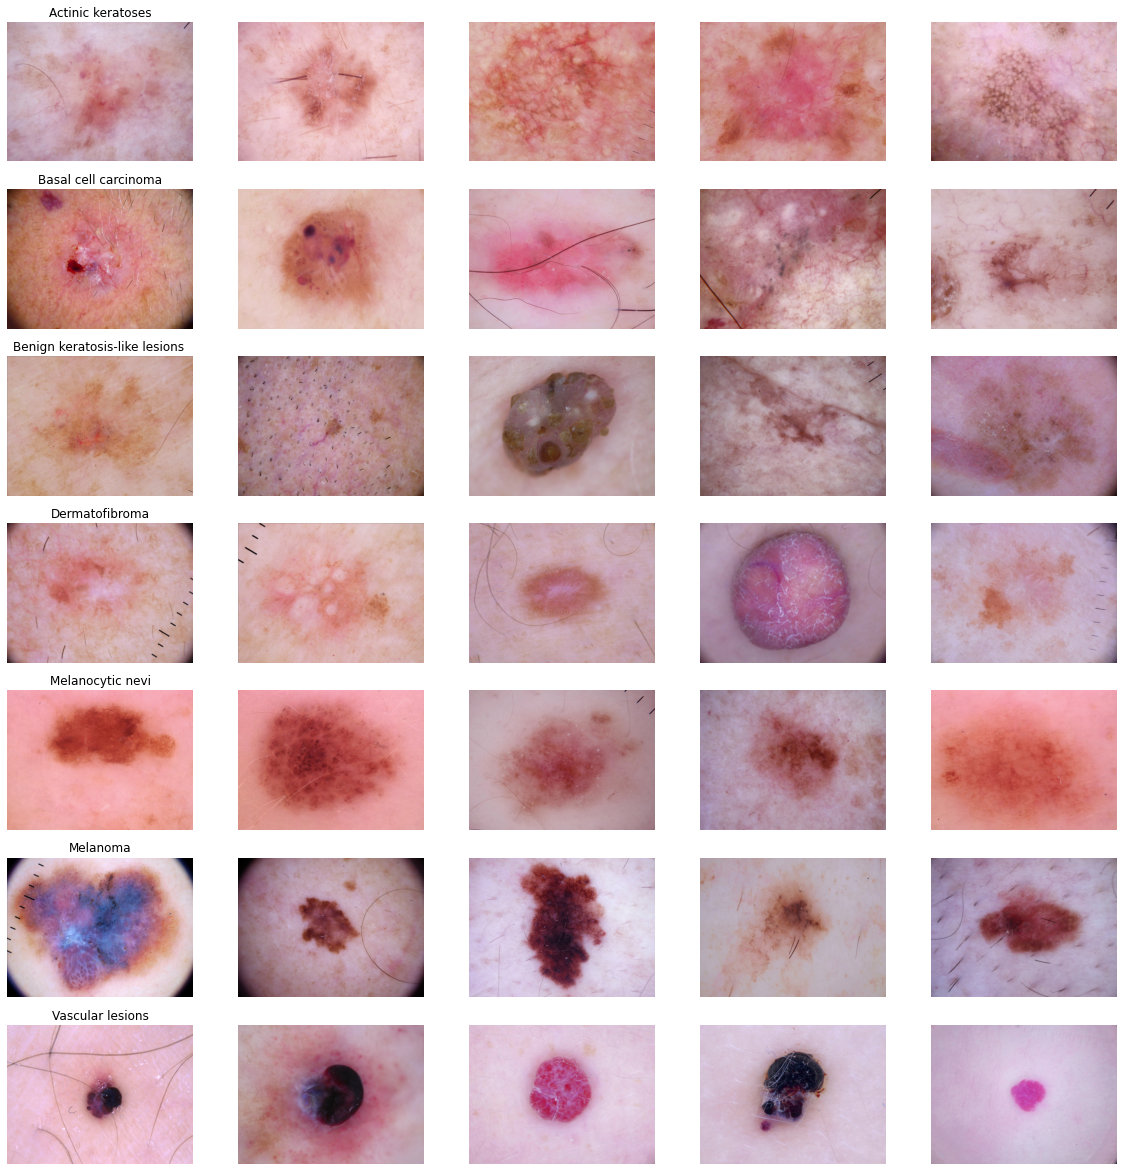

In [ ]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         tile_df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=2018).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

In [ ]:
rgb_info_df = tile_df.apply(lambda x: pd.Series({'{}_mean'.format(k): v for k, v in 
                                  zip(['Red', 'Green', 'Blue'], 
                                      np.mean(x['image'], (0, 1)))}),1)
gray_col_vec = rgb_info_df.apply(lambda x: np.mean(x), 1)
for c_col in rgb_info_df.columns:
    rgb_info_df[c_col] = rgb_info_df[c_col]/gray_col_vec
rgb_info_df['Gray_mean'] = gray_col_vec
rgb_info_df.sample(3)

,Red_mean,Green_mean,Blue_mean,Gray_mean
3595,1.337858,0.839295,0.822847,161.728653
8411,1.324596,0.845065,0.830339,151.962196
4076,1.525468,0.772955,0.701577,132.891428


In [ ]:
for c_col in rgb_info_df.columns:
    tile_df[c_col] = rgb_info_df[c_col].values 

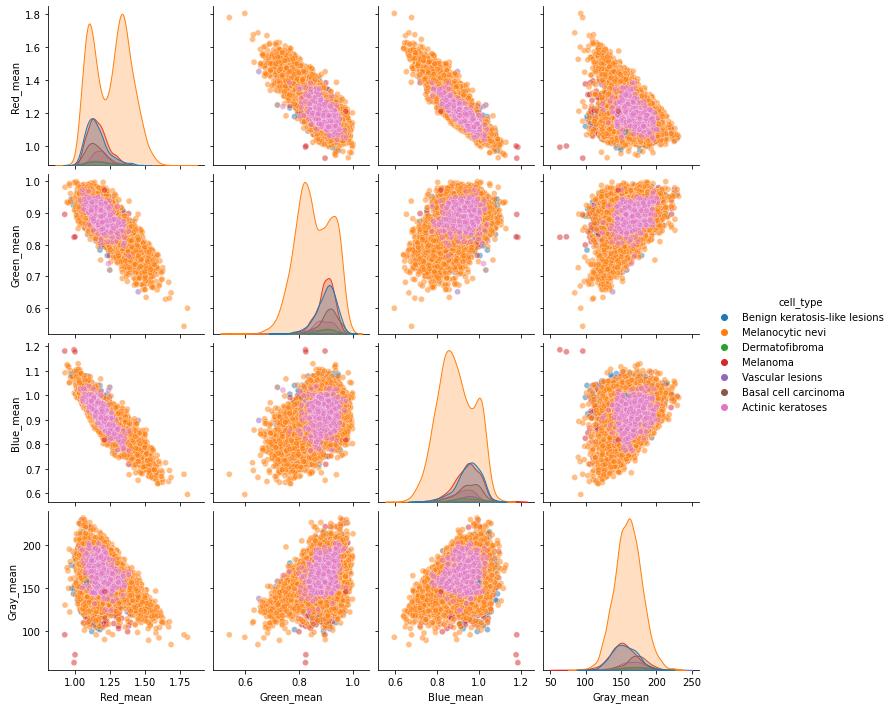

In [ ]:
sns.pairplot(tile_df[['Red_mean', 'Green_mean', 'Blue_mean', 'Gray_mean', 'cell_type']], 
             hue='cell_type', plot_kws = {'alpha': 0.5})

In [ ]:
n_samples = 5
for sample_col in ['Red_mean', 'Green_mean', 'Blue_mean', 'Gray_mean']:
    fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
    def take_n_space(in_rows, val_col, n):
        s_rows = in_rows.sort_values([val_col])
        s_idx = np.linspace(0, s_rows.shape[0]-1, n, dtype=int)
        return s_rows.iloc[s_idx]
    for n_axs, (type_name, type_rows) in zip(m_axs, 
                                             tile_df.sort_values(['cell_type']).groupby('cell_type')):

        for c_ax, (_, c_row) in zip(n_axs, 
                                    take_n_space(type_rows, 
                                                 sample_col,
                                                 n_samples).iterrows()):
            c_ax.imshow(c_row['image'])
            c_ax.axis('off')
            c_ax.set_title('{:2.2f}'.format(c_row[sample_col]))
        n_axs[0].set_title(type_name)
    fig.savefig('{}_samples.png'.format(sample_col), dpi=300)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
tile_df[['cell_type_idx', 'cell_type']].sort_values('cell_type_idx').drop_duplicates()

,cell_type_idx,cell_type
9804,0,Actinic keratoses
2528,1,Basal cell carcinoma
1018,2,Benign keratosis-like lesions
1159,3,Dermatofibroma
7050,4,Melanocytic nevi
1622,5,Melanoma
2413,6,Vascular lesions


Entrenamiento del modelo. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from glob import glob
from tqdm import tqdm
import tensorflow as tf
import keras
import numpy as np
import cv2
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import Xception,InceptionResNetV2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from numpy.random import seed
from keras.models import load_model
from tensorflow.keras.applications.mobilenet import MobileNet , preprocess_input

In [ ]:
# Reading the data
path = os.path.join('/content/drive/MyDrive/Dataset/')
#images_path = {os.path.splitext(os.path.basename(x))[0]:x for x in glob.glob(os.path.join(path,'*','*.jpg'))}
images_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(path, '*', '*.jpg'))}

In [ ]:
# Encoding target values
lesion_type_dict = {
    'nv':'Melanocytic Nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
    
}

In [ ]:
# Reading Metadata csv file
skin_df = pd.read_csv('/content/drive/MyDrive/Dataset/HAM10000_metadata.csv')

In [ ]:
# Adding extra columns and appending the required created columns in final dataframe
skin_df['path'] = skin_df['image_id'].map(images_path.get)
skin_df['cell_type'] = skin_df['dx'].map(lesion_type_dict.get)
skin_df['cell_type_idx'] = pd.Categorical(skin_df['cell_type']).codes
skin_df.sample(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,path,cell_type,cell_type_idx
2017,HAM_0005826,ISIC_0031077,mel,histo,65.0,female,trunk,vidir_molemax,/content/drive/MyDrive/Dataset/HAM10000_images...,Melanoma,5
5885,HAM_0006365,ISIC_0028296,nv,follow_up,80.0,male,lower extremity,vidir_molemax,/content/drive/MyDrive/Dataset/HAM10000_images...,Melanocytic Nevi,4
1811,HAM_0004859,ISIC_0033653,mel,histo,70.0,female,neck,vidir_modern,/content/drive/MyDrive/Dataset/HAM10000_images...,Melanoma,5
6591,HAM_0000503,ISIC_0029236,nv,follow_up,65.0,female,abdomen,vidir_molemax,/content/drive/MyDrive/Dataset/HAM10000_images...,Melanocytic Nevi,4
7035,HAM_0005561,ISIC_0031080,nv,histo,30.0,female,abdomen,vidir_modern,/content/drive/MyDrive/Dataset/HAM10000_images...,Melanocytic Nevi,4


In [ ]:
# Checking the dataframe info.
skin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lesion_id      10015 non-null  object 
 1   image_id       10015 non-null  object 
 2   dx             10015 non-null  object 
 3   dx_type        10015 non-null  object 
 4   age            9958 non-null   float64
 5   sex            10015 non-null  object 
 6   localization   10015 non-null  object 
 7   dataset        10015 non-null  object 
 8   path           10015 non-null  object 
 9   cell_type      10015 non-null  object 
 10  cell_type_idx  10015 non-null  int8   
dtypes: float64(1), int8(1), object(9)
memory usage: 792.3+ KB


In [ ]:
# Cambio de resolución para ingresar en la red los datos. Se toma 1 hora aproximadamente en cargar el dataset.
IMAGE_SIZE = 75
def read_img(img_path):
  img = cv2.imread(img_path,cv2.IMREAD_COLOR)
  img = cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE))
  return img
train_img = []
for img_name in tqdm(skin_df['path'].values):
  train_img.append(read_img(img_name))

100%|██████████| 10015/10015 [43:03<00:00,  3.88it/s]


In [ ]:
# Cambio de resolución para ingresar en la red los datos. Se toma 1 hora aproximadamente en cargar el dataset.
IMAGE_SIZE1 = 96
def read_img(img_path):
  img2 = cv2.imread(img_path,cv2.IMREAD_COLOR)
  img2 = cv2.resize(img2,(IMAGE_SIZE1,IMAGE_SIZE1))
  return img2
train_img2 = []
for img_name2 in tqdm(skin_df['path'].values):
  train_img2.append(read_img(img_name2))

100%|██████████| 10015/10015 [01:55<00:00, 87.02it/s]


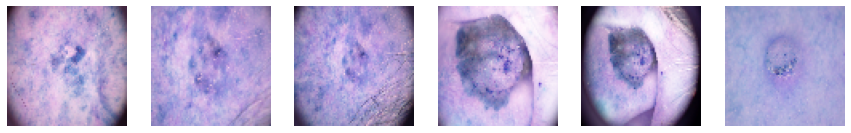

In [ ]:
#Ver las imagenes convertidas
plt.figure(figsize=(15,12))
for i in range(1,7,1):
    plt.subplot(1,6,i)
    plt.imshow(train_img[i])
    plt.axis('off')
plt.show()

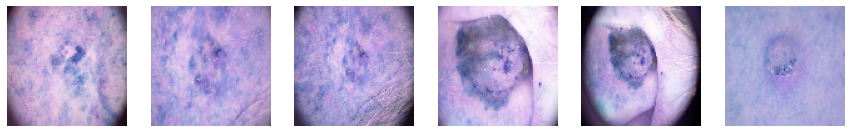

In [ ]:
#Ver las imagenes convertidas
plt.figure(figsize=(15,12))
for i in range(1,7,1):
    plt.subplot(1,6,i)
    plt.imshow(train_img2[i])
    plt.axis('off')
plt.show()

In [ ]:
# Convertir en una arreglo de flotantes normalizando.
X = np.array(train_img,np.float32)/255
X1 = np.array(train_img2,np.float32)/255
print(X.shape)
print(X1.shape)

(10015, 75, 75, 3)
(10015, 96, 96, 3)


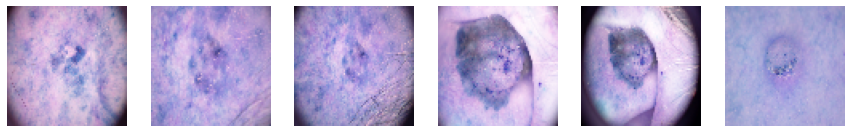

In [ ]:
#Ver imagenes normalizadas
plt.figure(figsize=(15,12))
for i in range(1,7,1):
    plt.subplot(1,6,i)
    plt.imshow(X[i])
    plt.axis('off')
plt.show()

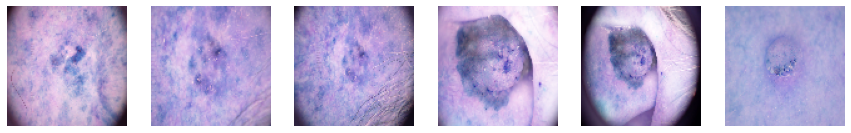

In [ ]:
#Ver imagenes normalizadas
plt.figure(figsize=(15,12))
for i in range(1,7,1):
    plt.subplot(1,6,i)
    plt.imshow(X1[i])
    plt.axis('off')
plt.show()

In [ ]:
# Creando el target
y = np.array(skin_df['cell_type_idx'])


In [ ]:
# Dividiendo el conjunto de datos
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=28,stratify=y)
x_train,x_val,y_train,y_val =   train_test_split(x_train,y_train,test_size=0.10,random_state=28,stratify=y_train)

In [ ]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(X1,y,test_size=0.10,random_state=28,stratify=y)
x_train1,x_val1,y_train1,y_val1 =   train_test_split(x_train1,y_train1,test_size=0.10,random_state=28,stratify=y_train1)

In [ ]:
# One-Hot Encoding valores
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 7)
y_val = to_categorical(y_val , num_classes=7)
y_train1 = to_categorical(y_train1, num_classes = 7)
y_val1 = to_categorical(y_val1 , num_classes=7)

In [ ]:
# Defining base model using MobileNetV2 module from Keras
training_shape2 = (96,96,3)
base_model2 = tf.keras.applications.MobileNetV2(include_top=False,weights='imagenet',input_shape = training_shape2)
for layer in base_model2.layers:
    layer.trainable = True                         # Training all layers from scratch

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
#Añadiendo las capas finales
n_classes = 7
model2 = base_model2.output
model2 = Flatten()(model2)
model2 = Dense(128)(model2)
model2 = Dropout(0.5)(model2)
model2 = BatchNormalization()(model2)
model2 = Activation('relu')(model2)
output2 = Dense(n_classes, activation='softmax')(model2)
model2 = Model(inputs=base_model2.input, outputs=output2)

In [ ]:
# Compilando el modelo
optimizer2 = Adam(lr=0.001)
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizer2, 
              metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 48, 48, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 48, 48, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 48, 48, 32)   0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
# Definiendo las epócas y el momento de detención del aprendizaje
n_epoch = 30

early_stop1 = EarlyStopping(monitor='val_loss', patience=20, verbose=1, 
                           mode='auto', restore_best_weights=True)

reduce_lr1 = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, 
                              verbose=1, mode='auto')

In [ ]:
# Ajustando el modelo
history1 = model2.fit(x_train1,
                    y_train1,
                    epochs=n_epoch,
                    callbacks=[reduce_lr1,early_stop1],
                    validation_data=(x_val1,y_val1)
                   )

Epoch 1/30
254/254 [==============================] - 45s 43ms/step - loss: 1.0827 - accuracy: 0.6430 - val_loss: 3.5335 - val_accuracy: 0.0333
Epoch 2/30
254/254 [==============================] - 10s 39ms/step - loss: 0.6573 - accuracy: 0.7684 - val_loss: 2.9082 - val_accuracy: 0.6696
Epoch 3/30
254/254 [==============================] - 10s 39ms/step - loss: 0.5763 - accuracy: 0.8007 - val_loss: 7.7140 - val_accuracy: 0.0144
Epoch 4/30
254/254 [==============================] - 10s 40ms/step - loss: 0.5282 - accuracy: 0.8097 - val_loss: 4.5012 - val_accuracy: 0.0721
Epoch 5/30
254/254 [==============================] - 10s 39ms/step - loss: 0.4937 - accuracy: 0.8283 - val_loss: 3.6673 - val_accuracy: 0.0654
Epoch 6/30
254/254 [==============================] - 10s 39ms/step - loss: 0.4313 - accuracy: 0.8486 - val_loss: 7.2375 - val_accuracy: 0.0177
Epoch 7/30
254/254 [==============================] - 10s 39ms/step - loss: 0.3933 - accuracy: 0.8638 - val_loss: 4.8438 - val_accuracy:

In [ ]:
training_shape = (75,75,3)
base_model = InceptionResNetV2(include_top=False,weights='imagenet',input_shape = training_shape)
for layer in base_model.layers:
    layer.trainable = True                         # Training all layers from scratch

219062272/219055592 [==============================] - 2s 0us/step


In [ ]:
#Añadiendo las capas finales
n_classes = 7
model = base_model.output
model = Flatten()(model)
model = Dense(128)(model)
model = Dropout(0.5)(model)
model = BatchNormalization()(model)
model = Activation('relu')(model)
output = Dense(n_classes, activation='softmax')(model)
model = Model(inputs=base_model.input, outputs=output)

In [ ]:
# Compilando el modelo
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 37, 37, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 37, 37, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 37, 37, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [ ]:
# Definiendo las epócas y el momento de detención del aprendizaje
n_epoch = 30

early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1, 
                           mode='auto', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, 
                              verbose=1, mode='auto')

In [ ]:
# Ajustando el modelo
history = model.fit(x_train,
                    y_train,
                    epochs=n_epoch,
                    callbacks=[reduce_lr,early_stop],
                    validation_data=(x_val,y_val)
                   )

Epoch 1/30
254/254 [==============================] - 45s 117ms/step - loss: 1.0846 - accuracy: 0.6405 - val_loss: 41.2280 - val_accuracy: 0.7118
Epoch 2/30
254/254 [==============================] - 26s 104ms/step - loss: 0.6662 - accuracy: 0.7645 - val_loss: 0.7042 - val_accuracy: 0.7517
Epoch 3/30
254/254 [==============================] - 26s 104ms/step - loss: 0.5298 - accuracy: 0.8074 - val_loss: 0.7190 - val_accuracy: 0.7716
Epoch 4/30
254/254 [==============================] - 26s 104ms/step - loss: 0.4583 - accuracy: 0.8390 - val_loss: 7.5207 - val_accuracy: 0.4501
Epoch 5/30
254/254 [==============================] - 26s 104ms/step - loss: 0.3635 - accuracy: 0.8719 - val_loss: 0.6861 - val_accuracy: 0.7594
Epoch 6/30
254/254 [==============================] - 26s 103ms/step - loss: 0.4104 - accuracy: 0.8652 - val_loss: 0.7764 - val_accuracy: 0.7494
Epoch 7/30
254/254 [==============================] - 26s 104ms/step - loss: 0.2828 - accuracy: 0.9079 - val_loss: 0.9100 - val_a

In [ ]:
#Salvando un modelo 
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
model.save('InceptionResNetV2mario.h5')


In [ ]:
#Salvando el otro modelo
model2.save('MobilenetV2mario.h5')

Text(0, 0.5, 'Accuracy')

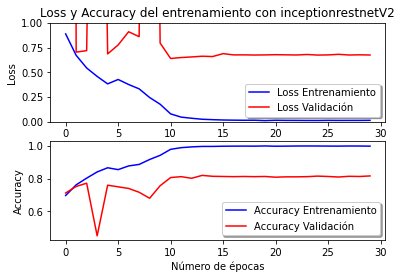

In [ ]:
#Calculando las métricas
fig, ax4 = plt.subplots(2,1)
ax4[0].plot(history.history['loss'], color='b', label="Loss Entrenamiento")
ax4[0].plot(history.history['val_loss'], color='r', label="Loss Validación",axes =ax4[0])
ax4[0].set_title("Loss y Accuracy del entrenamiento con inceptionrestnetV2")
ax4[0].set_ylabel("Loss")
ax4[0].set_ylim(0, 1)
legend = ax4[0].legend(loc='best', shadow=True)

ax4[1].plot(history.history['accuracy'], color='b', label="Accuracy Entrenamiento")
ax4[1].plot(history.history['val_accuracy'], color='r',label="Accuracy Validación")
legend = ax4[1].legend(loc='best', shadow=True)
ax4[1].set_xlabel("Número de épocas")
ax4[1].set_ylabel("Accuracy")



Text(0.5, 17.700000000000003, 'Número de épocas')

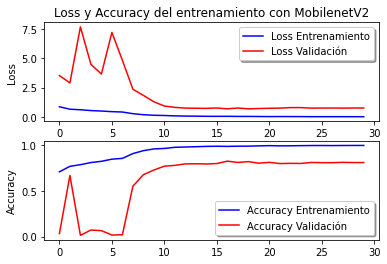

In [ ]:
fig, ax5 = plt.subplots(2,1)
ax5[0].plot(history1.history['loss'], color='b', label="Loss Entrenamiento")
ax5[0].plot(history1.history['val_loss'], color='r', label="Loss Validación",axes =ax5[0])
ax5[0].set_title("Loss y Accuracy del entrenamiento con MobilenetV2")
ax5[0].set_ylabel("Loss")
legend = ax5[0].legend(loc='best', shadow=True)

ax5[1].plot(history1.history['accuracy'], color='b', label="Accuracy Entrenamiento")
ax5[1].plot(history1.history['val_accuracy'], color='r',label="Accuracy Validación")
ax5[1].set_ylabel("Accuracy")
legend = ax5[1].legend(loc='best', shadow=True)
ax4[1].set_xlabel("Número de épocas")

In [ ]:
predicciones = model.predict(X)

In [ ]:
predicciones2 = model2.predict(X1)

99.94
99.666


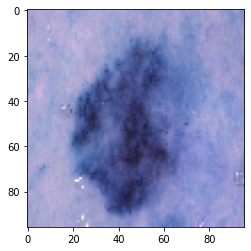

In [ ]:
print(round(predicciones[1957][5]*100,3))
predicciones[1957]
plt.imshow(X[1957])
print(round(predicciones2[1957][5]*100,3))
predicciones2[1957]
plt.imshow(X1[1957])

In [ ]:
#Se extrae la categoría con mayor probabilidad
predict_class = np.argmax(predicciones, axis=1)
predict_class = predict_class.tolist()
predict_class2 = np.argmax(predicciones2, axis=1)
predict_class2 = predict_class2.tolist()


In [ ]:
# concatenando las predicciones con el dataframe. 
data_df  = skin_df
#complete_data = pd.concat([data_df, pd.DataFrame(predicciones)], axis=1)
complete_data = pd.concat([data_df, pd.DataFrame(predict_class)], axis=1)
complete_data[0] = complete_data[0].astype('category')
complete_data['Inceptionrestnetv2'] = complete_data[0]
complete_data['Inceptionrestnetv2'] =complete_data['Inceptionrestnetv2'].astype('category')
del complete_data[0]
complete_data = pd.concat([complete_data, pd.DataFrame(predict_class2)], axis=1)
complete_data[0] = complete_data[0].astype('category')
complete_data['Mobilenetv2'] = complete_data[0]
del complete_data[0]

class_names = {0:'Actinic keratoses', 1:'Basal cell carcinoma', 
               2:'Benign keratosis-like lesions',3:'Dermatofibroma', 
               4:'Melanocytic Nevi',5:'Melanoma', 6: 'Vascular lesions'}

class_names1 = ['Actinic keratoses', 'Basal cell carcinoma', 
               'Benign keratosis-like lesions','Dermatofibroma', 
               'Melanocytic Nevi','Melanoma',  'Vascular lesions']


complete_data['cell_type_idxn'] = complete_data['cell_type_idx'].map(class_names)

complete_data['Inceptionrestnetv2n'] = complete_data['Inceptionrestnetv2'].map(class_names) 

complete_data['Mobilenetv2n'] = complete_data['Mobilenetv2'].map(class_names)


complete_data.head()




,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,path,cell_type,cell_type_idx,Inceptionrestnetv2,Mobilenetv2,cell_type_idxn,Inceptionrestnetv2n,Mobilenetv2n
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/Dataset/HAM10000_images...,Benign keratosis-like lesions,2,2,2,Benign keratosis-like lesions,Benign keratosis-like lesions,Benign keratosis-like lesions
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/Dataset/HAM10000_images...,Benign keratosis-like lesions,2,2,2,Benign keratosis-like lesions,Benign keratosis-like lesions,Benign keratosis-like lesions
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/Dataset/HAM10000_images...,Benign keratosis-like lesions,2,2,2,Benign keratosis-like lesions,Benign keratosis-like lesions,Benign keratosis-like lesions
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/Dataset/HAM10000_images...,Benign keratosis-like lesions,2,1,2,Benign keratosis-like lesions,Basal cell carcinoma,Benign keratosis-like lesions
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,/content/drive/MyDrive/Dataset/HAM10000_images...,Benign keratosis-like lesions,2,1,2,Benign keratosis-like lesions,Basal cell carcinoma,Benign keratosis-like lesions


                               precision    recall  f1-score   support

            Actinic keratoses       0.94      0.91      0.92       327
         Basal cell carcinoma       0.91      0.95      0.93       514
Benign keratosis-like lesions       0.94      0.93      0.94      1099
               Dermatofibroma       0.97      0.91      0.94       115
             Melanocytic Nevi       0.98      0.99      0.98      6705
                     Melanoma       0.93      0.91      0.92      1113
             Vascular lesions       0.98      0.97      0.98       142

                     accuracy                           0.97     10015
                    macro avg       0.95      0.94      0.94     10015
                 weighted avg       0.97      0.97      0.97     10015



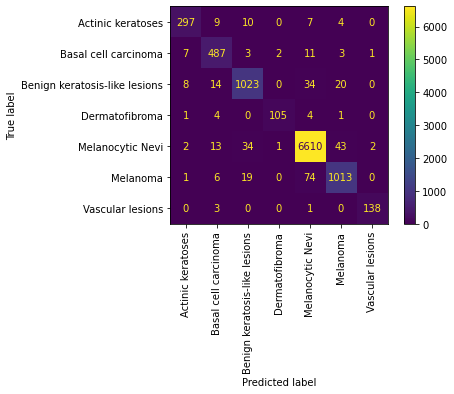

In [ ]:
#Se calculan métricas para Inceptionrestnetv2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score
cm = confusion_matrix(complete_data['cell_type_idxn'], complete_data['Inceptionrestnetv2n'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names1)
disp.plot(xticks_rotation='vertical', values_format = '.0f')
from sklearn.metrics import classification_report
print(classification_report(complete_data['cell_type_idxn'], complete_data['Inceptionrestnetv2n']))


In [ ]:

print("El valor de kappa es:",round(cohen_kappa_score(complete_data['cell_type_idxn'], complete_data['Inceptionrestnetv2n'],
                                        labels=None, weights=None, sample_weight=None),2))

El valor de kappa es: 0.93


                               precision    recall  f1-score   support

            Actinic keratoses       0.94      0.92      0.93       327
         Basal cell carcinoma       0.92      0.95      0.93       514
Benign keratosis-like lesions       0.92      0.94      0.93      1099
               Dermatofibroma       0.89      0.94      0.92       115
             Melanocytic Nevi       0.99      0.98      0.98      6705
                     Melanoma       0.92      0.92      0.92      1113
             Vascular lesions       0.93      0.98      0.96       142

                     accuracy                           0.96     10015
                    macro avg       0.93      0.95      0.94     10015
                 weighted avg       0.97      0.96      0.96     10015



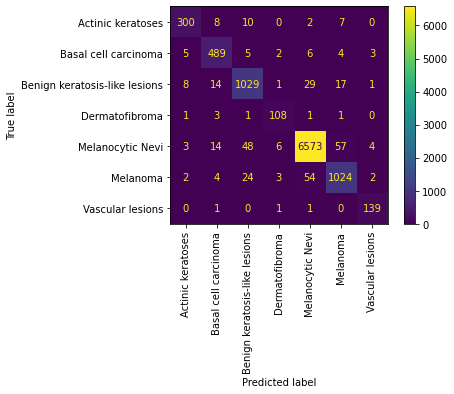

In [ ]:
#Se calculan métricas para Mobilenetv2
cm1 = confusion_matrix(complete_data['cell_type_idxn'], complete_data['Mobilenetv2n'])
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=class_names1)
disp1.plot(xticks_rotation='vertical', values_format = '.0f')
print(classification_report(complete_data['cell_type_idxn'], complete_data['Mobilenetv2n']))


In [ ]:
print("El valor de kappa es:",round(cohen_kappa_score(complete_data['cell_type_idxn'], complete_data['Mobilenetv2n'],
                                        labels=None, weights=None, sample_weight=None),2))

El valor de kappa es: 0.93
